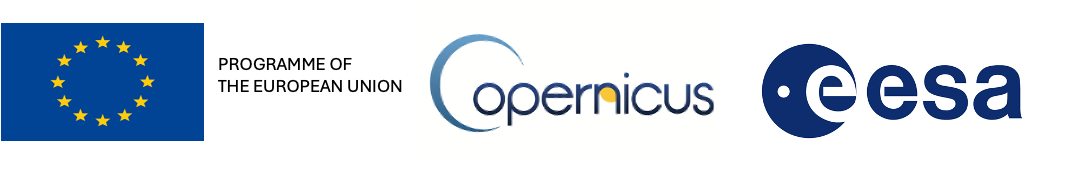

# SENTINEL-1 L1 GRD Product Format Prototype

## Table of Contents
1. [Introduction](#Introduction)
2. [Import modules](#Import-modules)
3. [File path definition](#File-path-definition)
4. [Read local files with EOPF](#Read-local-files-with-EOPF)
5. [Read remote files with xarray-datatree](#Read-remote-files-with-xarray-datatree)
6. [Examples of product usage](#Examples-of-product-usage)  
   [A. Decimation data](#Decimation-data)  
   [B. Geocoding using GCPs](#Geocoding-using-GCPs)  
   [C. Geographic selection](#Geographic-selection)  

## Introduction
In this notebook we will show an example of grd TOPSAR product and some easy usage examples


**Objectives**:  
   - Provide ready-to-use datasets and data variable  
   - Allow users to open and manipulate data using both standard external tools and the EOPF

**Relevant Features**:  
   - Swaths, bursts and polarization are separeted in different products  
   - The coordinates associated to the data are the physical coordinates  
   - The zarr product will adhere to CF convetion (this allow the user to open the prodoct with standards tools, such as xarray, exploiting properly the data coordinates).

**Notes**:

It is a preliminary example of product  
- Not all the metadata are included in these product prototype, but they will be included in the future.
- Among the excluded metadata, there are:
    - RFI
    - qualityInformation
    - downlinkInformation
- The stac attrabutes are still to be defined.
- The name of the variables are preliminary and they may change in the future.
- Variable attributes will be refined in the future, including:
    - long_name
    - units
    - and standard names for coordinates
- The chunking is not defined yet.
- Products naming convention is to be defined.
- Reading from local and remote storage with EOPF is experimental(branch feat/coords_in_vars, commit 10a4f2e1) and not officially released.1) and not offically released.

## Import modules

Dependencies

- datatree
- eopf
- xarray
- matplotlib
- cartopy

In [1]:
%matplotlib inline

import datatree
import xarray as xr

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["font.size"] = 10

## File path definition

**GRD**: S1A_IW_GRDH_1SDV_20240201T164915_20240201T164940_052368_065517_750E

**polarization**:VH

Remote file path

In [3]:
remote_product_path = "https://storage.sbg.cloud.ovh.net/v1/AUTH_8471d76cdd494d98a078f28b195dace4/sentinel-1-public/demo_product/grd/S01SIWGRH_20240201T164915_0025_A146_S000_5464A_VH.zarr"

Local file

**The listed file do not work with the latest `eopf-cpm` library and therefore the next cells are commented out**

In [4]:
# # Download the files into the folder ./scratch/demo_product/grd/
# !mkdir -p ./scratch/demo_product/
# !wget -q -r -nc -nH --cut-dirs=5 https://storage.sbg.cloud.ovh.net/v1/AUTH_8471d76cdd494d98a078f28b195dace4/sentinel-1-public/demo_product/grd/ --no-parent -P ./scratch/demo_product/grd/ --reject "index.html*"

# # Set the local product paths using the specified directory
# local_product_path = "./scratch/demo_product/grd/S01SIWGRH_20240201T164915_0025_A146_S000_5464A_VH.zarr"

## Read local files with EOPF

In [5]:
# store = EOZarrStore('./scratch/demo_product/grd/S01SIWGRH_20240201T164915_0025_A146_S000_5464A_VH.zarr')
# store = store.open()
# product = store.load()

In [6]:
# product

## Read remote files with xarray-datatree

(xarray extension that allow performing operations on hierachical structures)

In [7]:
dt = datatree.open_datatree(remote_product_path, engine="zarr", chunks={})
dt

/home/mclaus@eurac.edu/micromamba/envs/eopf/lib/python3.11/site-packages/ecmwflibs/__init__.py:81: UserWarning: /usr/lib/x86_64-linux-gnu/libgobject-2.0.so.0: undefined symbol: ffi_type_uint32, version LIBFFI_BASE_7.0
  warnings.warn(str(e))
/home/mclaus@eurac.edu/micromamba/envs/eopf/lib/python3.11/site-packages/xarray/backends/plugins.py:80: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


DataTree('None', parent=None)
│   Dimensions:  ()
│   Data variables:
│       *empty*
│   Attributes:
│       constellation:              sentinel-1
│       instrument:                 ['c-sar']
│       platform:                   sentinel-1a
│       sar:frequency_band:         C
│       sar:instrument_mode:        IW
│       sar:observation_direction:  right
│       sar:polarizations:          ['VH']
│       sar:product_type:           GRD
│       sat:absolute_orbit:         52368
│       sat:anx_datetime:           2024-02-01T16:38:33.596595Z
│       sat:orbit_state:            ascending
│       sat:relative_orbit:         146
├── DataTree('conditions')
│   ├── DataTree('attitude')
│   │       Dimensions:       (azimuth_time: 25)
│   │       Coordinates:
│   │         * azimuth_time  (azimuth_time) datetime64[ns] 200B 2024-02-01T16:49:15.8750...
│   │       Data variables:
│   │           pitch         (azimuth_time) float64 200B dask.array<chunksize=(25,), meta=np.ndarray>
│   │           q0            (azimuth_time) float64 200B dask.array<chunksize=(25,), meta=np.ndarray>
│   │           q1            (azimuth_time) float64 200B dask.array<chunksize=(25,), meta=np.ndarray>
│   │           q2            (azimuth_time) float64 200B dask.array<chunksize=(25,), meta=np.ndarray>
│   │           q3            (azimuth_time) float64 200B dask.array<chunksize=(25,), meta=np.ndarray>
│   │           roll          (azimuth_time) float64 200B dask.array<chunksize=(25,), meta=np.ndarray>
│   │           wx            (azimuth_time) float64 200B dask.array<chunksize=(25,), meta=np.ndarray>
│   │           wy            (azimuth_time) float64 200B dask.array<chunksize=(25,), meta=np.ndarray>
│   │           wz            (azimuth_time) float64 200B dask.array<chunksize=(25,), meta=np.ndarray>
│   │           yaw           (azimuth_time) float64 200B dask.array<chunksize=(25,), meta=np.ndarray>
│   │       Attributes:
│   │           ascending_node_time:    2024-02-01T16:38:33.596595
│   │           mode:                   IW
│   │           orbit_number:           52368
│   │           pass:                   ASCENDING
│   │           relative_orbit_number:  146
│   │           title:                  Attitude information used by the IPF during proce...
│   ├── DataTree('azimuth_fm_rate')
│   │       Dimensions:                     (azimuth_time: 10, degree: 3)
│   │       Coordinates:
│   │         * azimuth_time                (azimuth_time) datetime64[ns] 80B 2024-02-01T...
│   │         * degree                      (degree) int64 24B 0 1 2
│   │       Data variables:
│   │           azimuth_fm_rate_polynomial  (azimuth_time, degree) float64 240B dask.array<chunksize=(10, 3), meta=np.ndarray>
│   │           t0                          (azimuth_time) float64 80B dask.array<chunksize=(10,), meta=np.ndarray>
│   ├── DataTree('coordinate_conversion')
│   │       Dimensions:           (azimuth_time: 28, degree: 9)
│   │       Coordinates:
│   │         * azimuth_time      (azimuth_time) datetime64[ns] 224B 2024-02-01T16:49:13....
│   │         * degree            (degree) int64 72B 0 1 2 3 4 5 6 7 8
│   │       Data variables:
│   │           gr0               (azimuth_time) float64 224B dask.array<chunksize=(28,), meta=np.ndarray>
│   │           grsrCoefficients  (azimuth_time, degree) float64 2kB dask.array<chunksize=(28, 9), meta=np.ndarray>
│   │           slant_range_time  (azimuth_time) float64 224B dask.array<chunksize=(28,), meta=np.ndarray>
│   │           sr0               (azimuth_time) float64 224B dask.array<chunksize=(28,), meta=np.ndarray>
│   │           srgrCoefficients  (azimuth_time, degree) float64 2kB dask.array<chunksize=(28, 9), meta=np.ndarray>
│   ├── DataTree('doppler_centroid')
│   │       Dimensions:                            (azimuth_time: 27, degree: 3)
│   │       Coordinates:
│   │         * azimuth_time                       (azimuth_time) datetime64[ns] 216B 202...
│   │         * degree             

## Examples of product usage

In [8]:
# open data with xarray
grd = xr.open_dataset(remote_product_path, group="measurements", engine="zarr")["grd"]

### Decimation data

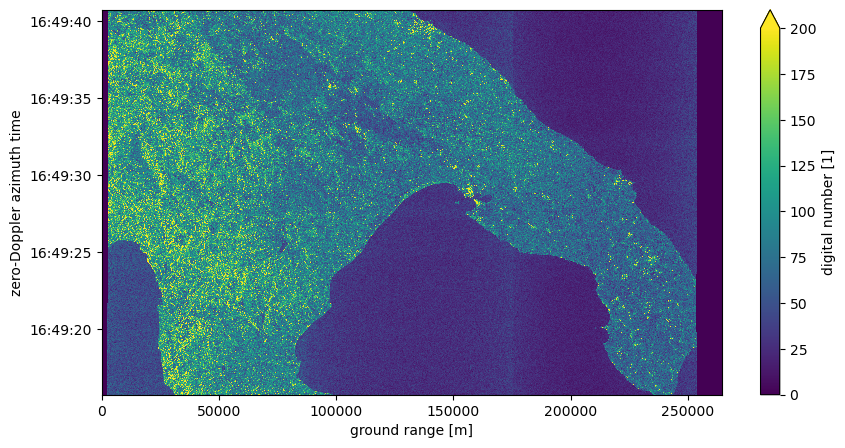

In [9]:
## decimation
grd_decimated = grd.isel(
    azimuth_time=slice(None, None, 10), ground_range=slice(None, None, 10)
)

## plot
grd_decimated.plot(vmax=200)
plt.show()

### Geocoding using GCPs
Interpolate and assign new geographic coordinates

In [10]:
gcp = xr.open_dataset(remote_product_path, group="conditions/gcp", engine="zarr")
gcp_iterpolated = gcp.interp_like(grd_decimated)

grd_decimated = grd_decimated.assign_coords(
    {"latitude": gcp_iterpolated.latitude, "longitude": gcp_iterpolated.longitude}
)

Plot in geographic coordinates

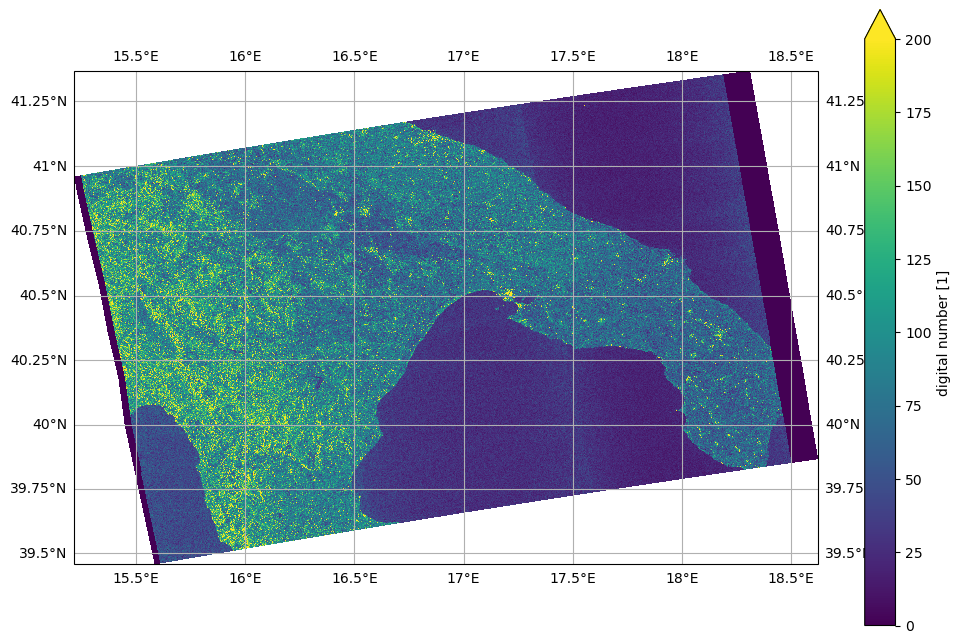

In [11]:
import cartopy.crs as ccrs

_, ax = plt.subplots(subplot_kw={"projection": ccrs.Miller()}, figsize=(12, 8))
gl = ax.gridlines(
    draw_labels=True, crs=ccrs.PlateCarree(), x_inline=False, y_inline=False
)
grd_decimated.plot(
    ax=ax, transform=ccrs.PlateCarree(), x="longitude", y="latitude", vmax=200
)
plt.show()

### Geographic selection
Region definition

In [12]:
lat_max = 40.5
lat_min = 40.25
lon_max = 17
lon_min = 16.5

polygon_lon = [lon_min, lon_max, lon_max, lon_min, lon_min]
polygon_lat = [lat_max, lat_max, lat_min, lat_min, lat_max]

Crop using lon lat coordinates

In [13]:
mask = (
    (grd_decimated.latitude < lat_max)
    & (grd_decimated.latitude > lat_min)
    & (grd_decimated.longitude < lon_max)
    & (grd_decimated.longitude > lon_min)
)
grd_crop = grd_decimated.where(mask, drop=True)

Plot in geographic coordinates

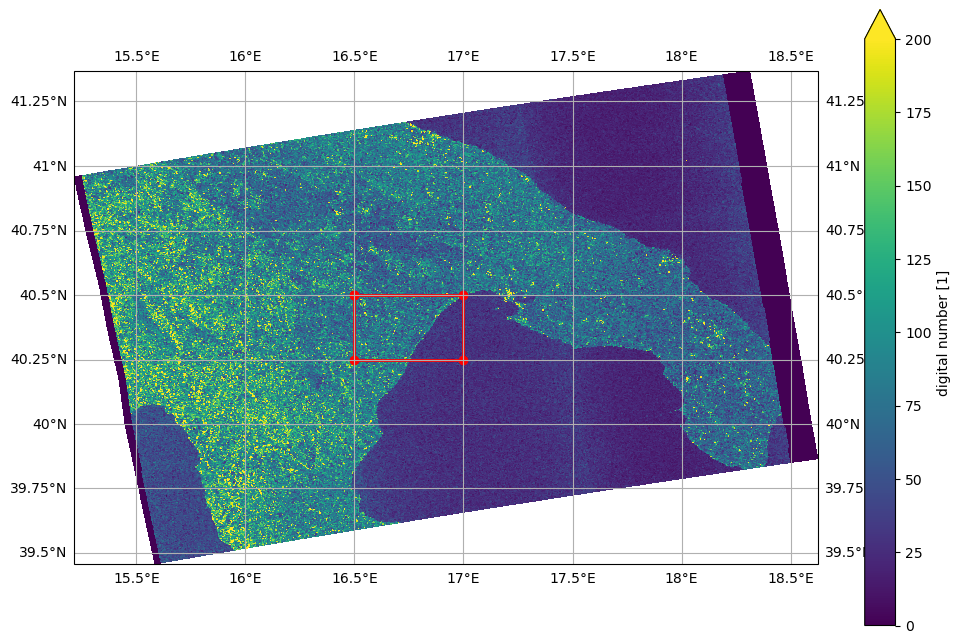

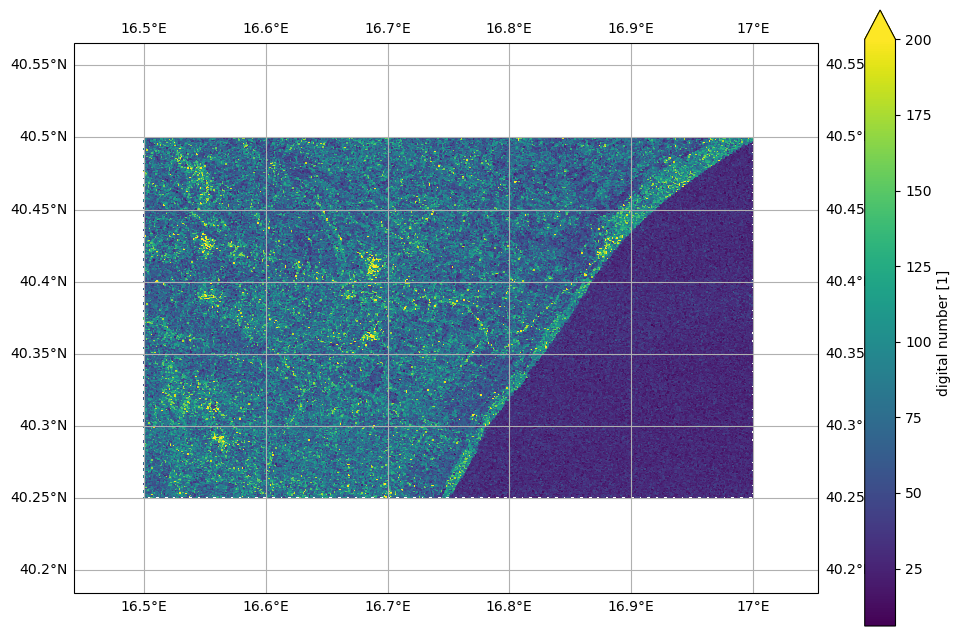

In [14]:
_, ax = plt.subplots(subplot_kw={"projection": ccrs.Miller()}, figsize=(12, 8))
gl = ax.gridlines(
    draw_labels=True, crs=ccrs.PlateCarree(), x_inline=False, y_inline=False
)
grd_decimated[::5, ::5].plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    x="longitude",
    y="latitude",
    vmax=200,
)
plt.plot(
    polygon_lon,
    polygon_lat,
    color="red",
    linewidth=2,
    marker="o",
    transform=ccrs.PlateCarree(),
)


_, ax = plt.subplots(subplot_kw={"projection": ccrs.Miller()}, figsize=(12, 8))
gl = ax.gridlines(
    draw_labels=True, crs=ccrs.PlateCarree(), x_inline=False, y_inline=False
)
grd_crop.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    x="longitude",
    y="latitude",
    vmax=200,
)
plt.show()